<div style="padding:20px;color:white;margin:0;font-size:175%;text-align:center;display:fill;border-radius:5px;background-color:#016CC9;overflow:hidden;font-weight:500">ADULT CENSUS INCOME</div>

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>1 | Preprocessing Steps</div></b>

### <b><span style='color:#DEB078'>1.1 |</span><span style='color:#016CC9'> Import Libraries</span></b>  

In [19]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import clear_output
from sklearn import model_selection,preprocessing,linear_model,metrics

### <b><span style='color:#DEB078'>1.2 |</span><span style='color:#016CC9'> Configure Settings</span></b>    

In [20]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 100
pd.set_option('display.max_rows',100)          # Set now of rows visible to 100

### <b><span style='color:#DEB078'>1.3 |</span><span style='color:#016CC9'> Import Files</span></b>    

In [21]:
df=pd.read_csv("../data/adult.csv")

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>2 | Dataframe Investigation</div></b>

### <b><span style='color:#DEB078'>2.1 |</span><span style='color:#016CC9'> Basic Steps</span></b> 

In [22]:
df.shape

(32561, 15)

In [23]:
pd.value_counts(df.dtypes)

object    9
int64     6
Name: count, dtype: int64

In [24]:
# No Null values present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [25]:
# Null values seems to be replaced with ?
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [26]:
import pandas as pd
import numpy as np
def make_dataset():
    df = pd.read_csv("../data/adult.csv")
    df[df == "?"] = np.nan
    for col in ["workclass", "occupation", "native.country"]:
        df.fillna(df[col].mode(0)[0], inplace=True)
    X = df.drop(["income"], axis=1)
    y = df["income"]
    return X, y

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
def my_train_test_split():
    X, y = make_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
    for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.fit_transform(X_test[feature])

    scaler = StandardScaler()
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
    X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X.columns)

    return X_train, X_test, y_train, y_test

def label_encoder():
    X, y = make_dataset()
    categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
    for feature in categorical:
        le = preprocessing.LabelEncoder()
        X[feature] = le.fit_transform(X[feature])

    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X, y

### <b><span style='color:#DEB078'>2.2 |</span><span style='color:#016CC9'> Null Value Check</span></b> 
3 Columns are having null value present

In [27]:
fig= make_subplots(rows=1,cols=2,
                  subplot_titles=("Null Value ratio column wise", "HeatMap for Null Values (0 -> Not Null & 1 -> Null)")
                  )



temp_data= df.isna().mean().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values),
    row=1, col=1
)

fig.add_trace(px.imshow(
                        df.isna().astype(np.int8)
                       ).data[0],
              row=1,col=2)

fig.update_layout(showlegend=False)
fig.show()

### <b><span style='color:#DEB078'>2.3 |</span><span style='color:#016CC9'> Unique Value Check</span></b> 

In [28]:
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64

In [29]:
fig = make_subplots(rows=1, cols=2,
                    subplot_titles=("Unique values per Categorical feature", "Unique values per Numerical feature"))


temp_data = df.select_dtypes(exclude="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,
           marker=dict(color='#016CC9')),
    row=1, col=1
)


temp_data = df.select_dtypes(include="number").nunique().sort_values()

fig.add_trace(
    go.Bar(x=temp_data.index, y=temp_data.values,
           marker=dict(color='#DEB078')),
    row=1, col=2
)

# fig.update_layout(showlegend=False)
fig.show()


### <b><span style='color:#DEB078'>2.4 |</span><span style='color:#016CC9'> Value Behaviour</span></b> 

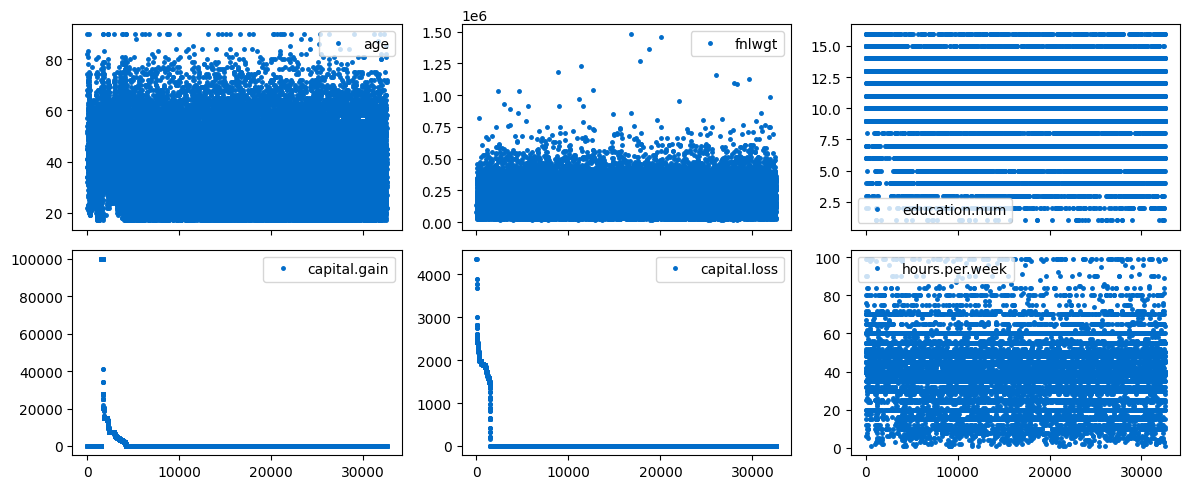

In [30]:
# For all Numerical columnn for all rows 
df.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#016CC9')
plt.tight_layout()

In [31]:
df[['education.num']]=df[['education.num']].astype('str')

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>3 | Univariate Analysis</div></b>  

### <b><span style='color:#DEB078'>3.1 |</span><span style='color:#016CC9'> Categorical Columns</span></b>  

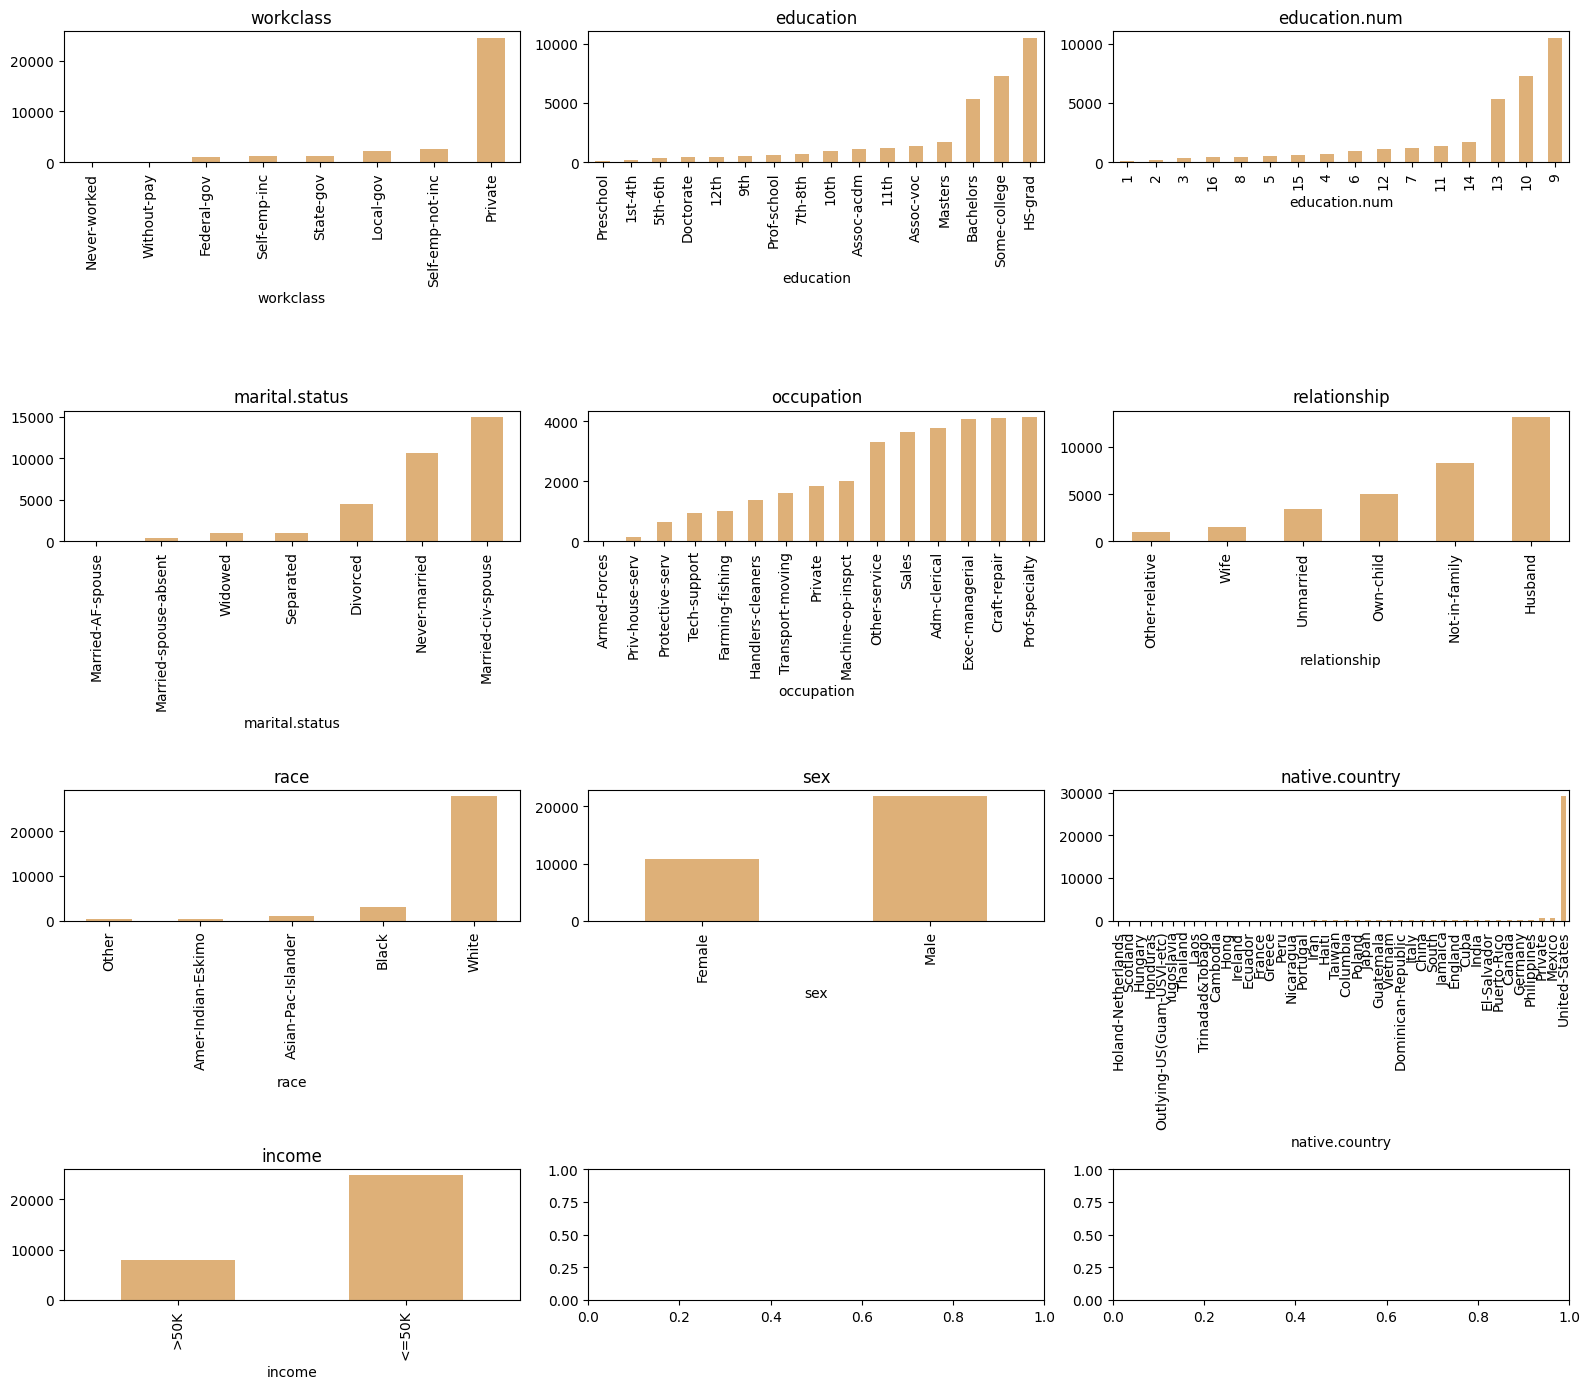

In [32]:
fields=df.select_dtypes(exclude="number").columns

figuresize=(16,14)
cols=3
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    df[fields[i-1]].value_counts().sort_values().plot.bar(color='#DEB078')  
    plt.xticks(rotation=90)
    plt.title(fields[i-1])
    
plt.tight_layout()
plt.show()

### <b><span style='color:#DEB078'>3.2 |</span><span style='color:#016CC9'> Numerical Columns</span></b>

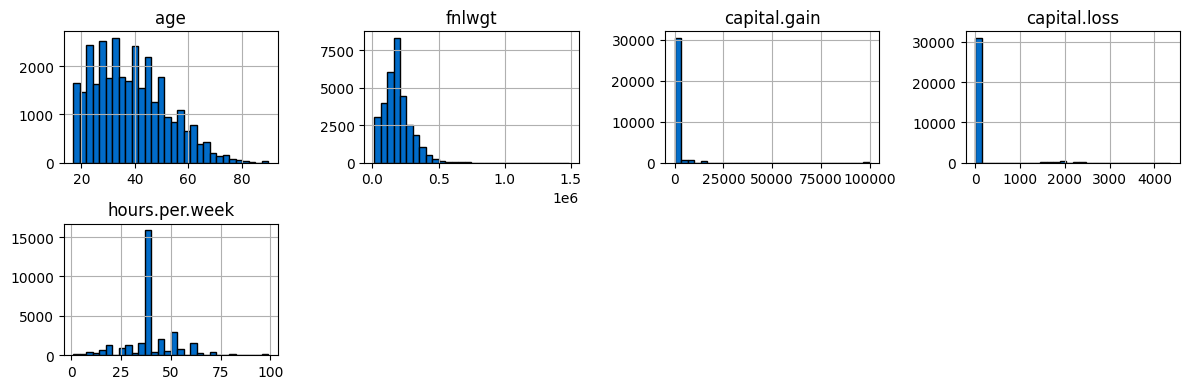

In [33]:
# Plots the histogram for each numerical feature in a separate subplot
figsize_val=(12,4)
layout_val=(-1, 4)
df.hist(bins=30, figsize=figsize_val, layout=layout_val, edgecolor="black",color='#016CC9')
plt.tight_layout();

In [34]:
df.skew()

TypeError: could not convert string to float: 'Private'

In [ ]:
kk=(df.select_dtypes(include='number').columns).to_list()

df2=df[kk]


upper =df2.quantile(0.75)+1.5 *(df2.quantile(0.75)-df2.quantile(0.25))
lower = df2.quantile(0.25)-1.5 *(df2.quantile(0.75)-df2.quantile(0.25))

for i in kk:
    print('\nColumn -> ',i,'')   
    x= df2[ (df2[i]<round(lower[i],2)) |  (df2[i]>round(upper[i],2))][i].to_list()
    print('No of Outliers presesnt -> ',len(x))
    print('\n','*'*10)

### <b><span style='color:#DEB078'>3.3 |</span><span style='color:#016CC9'> Target Variable</span></b> 

In [ ]:
df[['income']].value_counts(normalize=True).round(decimals=3)*100

In [ ]:
temp=dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12), 
                           height=500, width=1000))


In [ ]:
target=df[['income']].value_counts(normalize=True).round(decimals=3)*100

#target.rename(index={1:'Default',0:'Paid'},inplace=True)

pal, color=['#016CC9','#DEB078'], ['#8DBAE2','#EDD3B3']
fig=go.Figure()

fig.add_trace(go.Pie(labels=target.index, values=target, hole=.5, 
                     showlegend=True,sort=False, 
                     marker=dict(colors=color,line=dict(color=pal,width=2.5)),
                     hovertemplate = "%{label} Income: %{value:.2f}%<extra></extra>"))

fig.update_layout(template=temp, title='Target Distribution', 
                  legend=dict(traceorder='reversed',y=1.05,x=0),
                  uniformtext_minsize=15, uniformtext_mode='hide',width=700)
fig.show()

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>4 | Multivariate Analysis</div></b>    

### <b><span style='color:#DEB078'>4.1 |</span><span style='color:#016CC9'> Target variable Relation with Categorical variables</span></b>

In [ ]:
df.select_dtypes(exclude='number').columns[:-1]

In [ ]:
#Helping Function to get % for categories and overall

def stats(x):
    temp1=(df[[x,'income']].value_counts(normalize=True).round(decimals=3)*100).reset_index().rename(columns={0:'Overall_Percent'})
    Coloumn_To_Aggregate=[x,'income']
    df6=pd.merge(df.groupby(Coloumn_To_Aggregate).size().reset_index(name='ind_siz'), 
                 df.groupby(Coloumn_To_Aggregate[:-1]).size().reset_index(name='Total'), on =Coloumn_To_Aggregate[:-1])
    df6['Category_Percent']=round((df6['ind_siz']/df6['Total'])*100 ,2)
    temp2=df6[[x,'income','Category_Percent']]
    temp3=temp1.merge(temp2,on=[x,'income'])
    return temp3.pivot(columns=x,index='income')

#### Workclass

In [ ]:
px.histogram(df, x='workclass', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('workclass')

***
--Overall
* 75.9 % (<=50K) -> 54.5 % were from Private  
* 24.1 % (>50k) -> 15.2 % were from Private 

***
--Category wise
* 55.73 % of people from Self-emp-inc background have income >50k
* 38.65 % of people from Federal-gov background  have income >50k
* 29.48 % of people from Local-gov background have income >50k
* 21.87 % of people from Private background have income >50k
***

#### Education

In [ ]:
px.histogram(df, x='education', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('education')

***
--Overall
* 75.9 % (<=50K) -> 27.1 % were from HS-grad background 
* 24.1 % (>50k) -> 6.8 % were from Bachelors background

***
--Category wise
* 74.09 % of people from Doctorate background have income >50k
* 73.44 % of people from Prof-school background  have income >50k
* 41.48 % of people from Bachelors background have income >50k
***

#### Education.num

In [ ]:
px.histogram(df, x='education.num', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('education.num')

***
--Overall
* 75.9 % (<=50K) -> 27.1 % have education.num -> 9
* 24.1 % (>50k) -> 6.8 % have education.num -> 13

***
--Category wise
* 74.09 % of people having education.num -> 16  have income >50k
* 73.44 % of people having education.num -> 15  have income >50k
* 55.66 % of people having education.num -> 14  have income >50k
* 41.48 % of people having education.num -> 13  have income >50k
***

#### Marital.status

In [ ]:
px.histogram(df, x='marital.status', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('marital.status')

***
--Overall
* 75.9 % (<=50K) -> 31.3 % were Never-married
* 24.1 % (>50k) -> 20.6 % were Married-civ-spouse 

***
--Category wise
* 44.68 % of people from Married-civ-spouse category have income >50k
* 43.48 % of people from Married-AF-spouse category  have income >50k

***

#### Occupation

In [ ]:
px.histogram(df, x='occupation', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('occupation')

***
--Overall
* 75.9 % (<=50K) -> 10.0 % were from Adm-clerical  
* 24.1 % (>50k) ->   6.0 % were from Exec-managerial 

***
--Category wise
* 48.4 % of people from Exec-managerial have income >50k
* 44.9 % of people from Prof-specialty  have income >50k
***

#### Relationship

In [ ]:
px.histogram(df, x='relationship', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('relationship')

***
--Overall
* 75.9 % (<=50K) -> 22.9 % were Not-in-family 
* 24.1 % (>50k) ->   18.2 % were Husband

***
--Category wise
* 47.51 % of people from wife category have income >50k
* 44.86 % of people from Husband  have income >50k
***

#### Race

In [ ]:
px.histogram(df, x='race', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('race')

***
--Overall
* 75.9 % (<=50K) -> 63.6 % were White  
* 24.1 % (>50k) ->  21.9 % were White

***
--Category wise
* 26.56 % of people from Asian-Pac-Islander category have income >50k
* 25.59 % of people from white category have income >50k
***

#### Sex

In [ ]:
px.histogram(df, x='sex', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('sex')

***
--Overall
* 75.9 % (<=50K) -> 46.5 % were Male  
* 24.1 % (>50k) ->  20.5 % were Male

***
--Category wise
* 10.95 % of people from male category have income >50k
* 30.57 % of people from female category have income >50k
***

#### Native.country

In [ ]:
px.histogram(df, x='native.country', color="income", barmode='group',color_discrete_sequence=['#016CC9','#DEB078'])

In [ ]:
stats('native.country')

***
--Overall
* 75.9 % (<=50K) -> 67.6 % were from United-States  
* 24.1 % (>50k) ->  22.0 % were from United-States 

***
--Category wise
* 41.86 % of people from Iran have income >50k
* 41.38 % of people from France have income >50k
* 24.58 % of people from United-States  have income >50k
***

### <b><span style='color:#DEB078'>4.2 |</span><span style='color:#016CC9'> Target variable Relation with Numerical variables</span></b> 

In [ ]:
p=df.select_dtypes(include='number').columns.to_list()
p.append("income")
y=3
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(14,6))

for i in range(1,len(p)) :
    plt.subplot(x,y,i)
    sns.boxplot(data=df,y=p[i-1],x='income',palette=['#016CC9','#DEB078'])
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()    
plt.show()

In [ ]:
p=df.select_dtypes(include='number').columns.to_list()
p.append("income")
y=3
x=math.ceil((len(p)-1)/y)

plt.subplots(x,y,figsize=(14,6))

for i in range(1,len(p)) :
    plt.subplot(x,y,i)
    sns.pointplot(data=df,y=p[i-1],x='income',color='#DEB078')
    #plt.xlabel(vars[i-1])
    #plt.title(vars[i-1])
plt.tight_layout()    
plt.show()

### <b><span style='color:#DEB078'>4.3 |</span><span style='color:#016CC9'> Other relationships</span></b> 

In [ ]:
fig = px.imshow(df.corr().round(2),zmin=-1,zmax=1, text_auto=True,width=1200,height=650,aspect=None,color_continuous_scale=['#016CC9','#DEB078'])
fig.show()

* No relationships among variable

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>5 | Feature Engineering</div></b>      

### <b><span style='color:#DEB078'>5.1 |</span><span style='color:#016CC9'> Replace ? with null</span></b>  

In [ ]:
df=df.applymap(lambda x: np.nan if x=='?' else x)

### <b><span style='color:#DEB078'>5.2 |</span><span style='color:#016CC9'> Variable Splits</span></b>   

In [ ]:
target_Variable     = 'income'
input_features      = [col for col in df.columns if col not in ['kfold',target_Variable]]
numerical_columns   = ['age', 'fnlwgt','capital.gain', 'capital.loss','hours.per.week']
categorical_columns = [col for col in input_features if not col in numerical_columns]

### <b><span style='color:#DEB078'>5.3 |</span><span style='color:#016CC9'> Create Folds</span></b>   

In [ ]:
def create_stratified_folds(data,no_of_splits,target_column):
    
    data['kfold']=-1
    
    data=data.sample(frac=1,random_state=3) # random state to generate same set (seed)(for reproducibility.)
    
    kf=model_selection.StratifiedKFold(n_splits=no_of_splits)
    
    for fold,(train_indexes,test_indexes) in enumerate(kf.split(df,df[target_column].values)):
        data.loc[test_indexes,'kfold']=np.int16(fold)
   
    return data

### <b><span style='color:#DEB078'>5.4 |</span><span style='color:#016CC9'> Handle Null Values</span></b>   

In [ ]:
def impute_Null_Values(data,categorical_columns,numerical_columns):
    
    for col in categorical_columns:
        data.loc[:, col] = data[col].fillna("NONE")
        
    for cols in numerical_columns:
        data.loc[:, cols] = data[cols].fillna(data[cols].median())
        
    return data

### <b><span style='color:#DEB078'>5.5 |</span><span style='color:#016CC9'> Handle Categorical Variables</span></b>

In [ ]:
   
def handle_categorical_variables(train_data,test_data,categorical_columns):
           
            # initialize OnehotEncoder for each feature column
            ohe = preprocessing.OneHotEncoder(sparse=False)
            # fit  encoder on all Train
            ohe.fit(pd.concat([train_data[categorical_columns],test_data[categorical_columns]]))
            
            # transform all the data
            train_data_ohe = pd.DataFrame(ohe.transform(train_data[categorical_columns]))    
            test_data_ohe  = pd.DataFrame(ohe.transform(test_data[categorical_columns]))
            
            train_data_ohe.index = train_data.index
            test_data_ohe.index  = test_data.index
            
            train_data.drop(columns=categorical_columns,inplace=True)
            test_data.drop(columns=categorical_columns,inplace=True)           
            
           # Add one-hot encoded columns to numerical features
            train_data = pd.concat([train_data, train_data_ohe], axis=1) # Your code here
            test_data = pd.concat([test_data, test_data_ohe], axis=1)
            
            return train_data,test_data

### <b><span style='color:#DEB078'>5.6 |</span><span style='color:#016CC9'> Handle Numerical Variables</span></b>

In [ ]:
def handle_numerical_variables(train_data,test_data,numerical_columns):
    scaler = preprocessing.StandardScaler()
    scaler.fit(train_data[numerical_columns])
    train_data[numerical_columns]=scaler.transform(train_data[numerical_columns]) 
    test_data[numerical_columns]=scaler.transform(test_data[numerical_columns])
    
    return train_data,test_data

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>6 | Model</div></b>       

In [ ]:
df1=create_stratified_folds(df,5,'income')

target_mapping={'<=50K':0,'>50K':1}
df1.loc[:,'income']=df1[target_Variable].map(target_mapping)

t=np.arange(0,1,step=0.001)
Possible_best_thresholds=[]
average_auc=[]
df1=impute_Null_Values(df1,categorical_columns,numerical_columns)

for i in range(5):
    train_df = df1[df1['kfold']!=i]
    test_df  = df1[df1['kfold']==i]

    train_df,test_df = handle_categorical_variables(train_df, test_df,categorical_columns)
    train_df,test_df = handle_numerical_variables(train_df,test_df,numerical_columns)

    x_train_df = train_df.drop(columns=['income','kfold'])
    y_train_df = train_df.income

    x_test_df = test_df.drop(columns=['income','kfold'])
    y_test_df = test_df.income

    # initialize Logistic Regression model
    model = linear_model.LogisticRegression()
    model.fit(x_train_df, y_train_df)

    valid_preds = model.predict_proba(x_test_df)[:, 1]
    auc = metrics.roc_auc_score(y_test_df, valid_preds)
    
    print(f'FOLD -> {i} | AUC -> {auc}')
    
    thresholds = t

    auc=[]
    # for every threshold, calculate predictions in binary # and append calculated precisions and recalls
    # to their respective lists
    for i in thresholds:
        temp_prediction = [1 if x >= i else 0 for x in valid_preds] 
        #print(i,metrics.roc_auc_score(y_test_df, temp_prediction))
        auc.append(metrics.roc_auc_score(y_test_df, temp_prediction))


    max_value = max(auc)
    index = auc.index(max_value)
    print('With Threshold -> ',t[index],' we get max AUC value ',auc[index])
    average_auc.append(auc[index])
    Possible_best_thresholds.append(t[index])
    print('*'*15)

In [ ]:
print('Average Possible_best_thresholds -> ',np.array(Possible_best_thresholds).mean())
print('Average AUC value -> ',np.array(average_auc).mean())

## <b><div style='padding:15px;background-color:#79A7D3;color:white;border-radius:2px;font-size:90%'>7 | Other Notebooks</div></b>       

If you liked this notebook, you can also check out my other notebooks and provide your feedback.
* https://www.kaggle.com/code/abhi011097/detailed-eda-basic-model-spaceship-titanic
* https://www.kaggle.com/code/abhi011097/learn-practice-pyspark-pandas-sql
* https://www.kaggle.com/abhi011097/code